# Loan Data from Prosper (Communicate Data Findings)
## by (Tae-Hee Cho)

## Preliminary Wrangling

> This notebook is aimed at analysing the main value drivers of the P2P Lending marketplace Prosper, to ascertain which loans drive the revenues and perform a profiling of the most profitable borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 81)
sns.set(style="darkgrid")

In [2]:
# load the raw dataset

df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
# preview the dataset

print(df.shape)
print(df.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# see number of null values on each columns

df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
# see number of duplicated data entries

df.duplicated().any()

False

In [7]:
# Create 'PastBorrower' column:

# https://stackoverflow.com/questions/49161120/pandas-python-set-value-of-one-column-based-on-value-in-another-column

df.loc[df['TotalProsperLoans'].isna(), 'PastBorrower'] = 'No'
df.loc[df['TotalProsperLoans'] == 0, 'PastBorrower'] = 'No'
df.loc[df['TotalProsperLoans'] > 0, 'PastBorrower'] = 'Yes'
df['PastBorrower'].head()

0     No
1     No
2     No
3     No
4    Yes
Name: PastBorrower, dtype: object

In [8]:
df['PastBorrower'].value_counts()

No     91853
Yes    22084
Name: PastBorrower, dtype: int64

In [9]:
# Convert numeric values of ListingCategory to Alphabetical values,
# based on definitions given by : "Prosper Loan Data - Variable Definitions.xlsx"

df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype(str)
df.replace({'ListingCategory (numeric)':{'0': 'Not Available', '1': 'Debt Consolidation', '2': 'Home Improvement',
                                        '3': 'Business', '4': 'Personal Loan', '5': 'Student Use', '6': 'Auto',
                                        '7': 'Other', '8': 'Baby&Adoption', '9': 'Boat', '10': 'Cosmetic Procedure',
                                        '11': 'Engagement Ring', '12': 'Green Loans', '13': 'Household Expenses',
                                        '14': 'Large Purchases', '15': 'Medical/Dental', '16': 'Motorcycle',
                                        '17': 'RV', '18': 'Taxes', '19': 'Vacation', '20': 'Wedding Loans'}},
          inplace = True)

In [10]:
# Create 'StatedAnnualIncome' column

df['StatedAnnualIncome'] = df['StatedMonthlyIncome'] * 12
df.loc[:, ['StatedAnnualIncome', 'StatedMonthlyIncome']]

,StatedAnnualIncome,StatedMonthlyIncome
0,36999.999996,3083.333333
1,73500.000000,6125.000000
2,24999.999996,2083.333333
3,34500.000000,2875.000000
4,114999.999996,9583.333333
5,99999.999996,8333.333333
6,24999.999996,2083.333333
7,40269.000000,3355.750000
8,39999.999996,3333.333333
9,39999.999996,3333.333333


In [11]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,...,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,PastBorrower,StatedAnnualIncome
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,...,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,No,36999.999996
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,Home Improvement,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,...,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,No,73500.000000
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,No,24999.999996
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,Motorcycle,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,...,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,No,34500.000000
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0

In [12]:
# filter out loans without ProsperScores

df_2 = df[df['ProsperScore'].isnull()==False]

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 83 columns):
ListingKey                             84853 non-null object
ListingNumber                          84853 non-null int64
ListingCreationDate                    84853 non-null object
CreditGrade                            0 non-null object
Term                                   84853 non-null int64
LoanStatus                             84853 non-null object
ClosedDate                             26005 non-null object
BorrowerAPR                            84853 non-null float64
BorrowerRate                           84853 non-null float64
LenderYield                            84853 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha)              

In [14]:
df_2.shape

(84853, 83)

In [15]:
df.shape

(113937, 83)

In [16]:
df.loc[:,['CreditGrade', 'TotalProsperLoans', 'LoanNumber','LoanOriginalAmount','ProsperPrincipalBorrowed']]

,CreditGrade,TotalProsperLoans,LoanNumber,LoanOriginalAmount,ProsperPrincipalBorrowed
0,C,NaN,19141,9425,NaN
1,NaN,NaN,134815,10000,NaN
2,HR,NaN,6466,3001,NaN
3,NaN,NaN,77296,10000,NaN
4,NaN,1.0,102670,15000,11000.0
5,NaN,NaN,123257,15000,NaN
6,NaN,NaN,88353,3000,NaN
7,NaN,NaN,90051,10000,NaN
8,NaN,NaN,121268,10000,NaN
9,NaN,NaN,121268,10000,NaN


In [17]:
df_clean = df_2.copy()

In [18]:
# select columns that are to be used in the Dateset

columns = ['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanNumber','Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
           'ProsperRating(Alpha)', 'ListingCategory (numeric)', 'ProsperScore','BorrowerState','Occupation', 
           'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'AmountDelinquent',
           'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
           'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigination', 'PastBorrower', 'Investors',
           'CurrentDelinquencies', 'AmountDelinquent', 'StatedAnnualIncome']
df_clean = df_clean.loc[:,columns]
df_clean

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,ListingKey,ListingCreationDate,CreditGrade,LoanNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating(Alpha),ListingCategory (numeric),ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,PastBorrower,Investors,CurrentDelinquencies,AmountDelinquent,StatedAnnualIncome
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,134815,36,Current,0.12016,0.0920,NaN,Home Improvement,7.0,CO,Professional,Employed,44.0,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,0,No,1,0.0,0.0,73500.000000
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,77296,36,Current,0.12528,0.0974,NaN,Motorcycle,9.0,GA,Skilled Labor,Employed,113.0,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,16,No,158,4.0,10056.0,34500.000000
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,102670,36,Current,0.24614,0.2085,NaN,Home Improvement,4.0,MN,Executive,Employed,44.0,True,0.0,0.26,"$100,000+",True,9583.333333,0,6,Yes,20,0.0,0.0,114999.999996
5,0F05359734824199381F61D,2013-12-14 08:26:37.093000000,NaN,123257,60,Current,0.15425,0.1314,NaN,Debt Consolidation,10.0,NM,Professional,Employed,82.0,True,0.0,0.36,"$100,000+",True,8333.333333,0,3,No,1,0.0,0.0,99999.999996
6,0F0A3576754255009D63151,2013-04-12 09:52:56.147000000,NaN,88353,36,Current,0.31032,0.2712,NaN,Debt Consolidation,2.0,KS,Sales - Retail,Employed,172.0,False,0.0,0.27,"$25,000-49,999",True,2083.333333,0,11,No,1,0.0,0.0,24999.999996
7,0F1035772717087366F9EA7,2013-05-05 06:49:27.493000000,NaN,90051,36,Current,0.23939,0.2019,NaN,Home Improvement,4.0,CA,Laborer,Employed,103.0,False,0.0,0.24,"$25,000-49,999",True,3355.750000,0,10,No,1,0.0,0.0,40269.000000
8,0F043596202561788EA13D5,2013-12-02 10:43:39.117000000,NaN,121268,36,Current,0.07620,0.0629,NaN,Other,9.0,IL,Food Service,Employed,269.0,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,3,No,1,0.0,0.0,39999.999996
9,0F043596202561788EA13D5,2013-12-02 10:43:39.117000000,NaN,121268,36,Current,0.07620,0.0629,NaN,Other,11.0,IL,Food Service,Employed,269.0,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,3,No,1,0.0,0.0,39999.999996
10,0F123545674891886D9F106,2012-05-10 07:04:01.577000000,NaN,65946,60,Current,0.27462,0.2489,NaN,Debt Consolidation,7.0,MD,Fireman,Employed,300.0,False,253.0,0.12,"$75,000-99,999",True,7500.000000,0,22,No,19,1.0,253.0,90000.000000
12,0F1A3597143888805163EF7,2013-12-15 20:01:10.757000000,NaN,125045,36,Past Due (1-15 days),0.17969,0.1435,NaN,Debt Consolidation,4.0,AL,Sales - Retail,Employed,1.0,False,0.0,0.18,"$25,000-49,999",True,2416.666667,3,2,No,1,0.0,0.0,29000.000004


In [19]:
df_clean['Term'].value_counts()

36    58695
60    24545
12     1613
Name: Term, dtype: int64

### What is the structure of your dataset?

> There are total of 113937 loans entries saved in the dataset and 81 attributes. Each loan contain information on the borrowered's background information and details regarding the loans.

### What is/are the main feature(s) of interest in your dataset?

> The Borrowers' APR will be analyzied with many factors such as the borrower's occupation, loan term and income status etc that could influence change in borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Prosper Rating and score could show low Borrower's APR because higher rating reflect the borrower's personality to be more trustworthy. 

## Univariate Exploration

> _In this section, we will investigate the distributions of individual variables._

### Visualisation 1

> _The visualiztion will investigate the distributions of borrowers based on their proof of income, Loan Term, Credit Score etc._

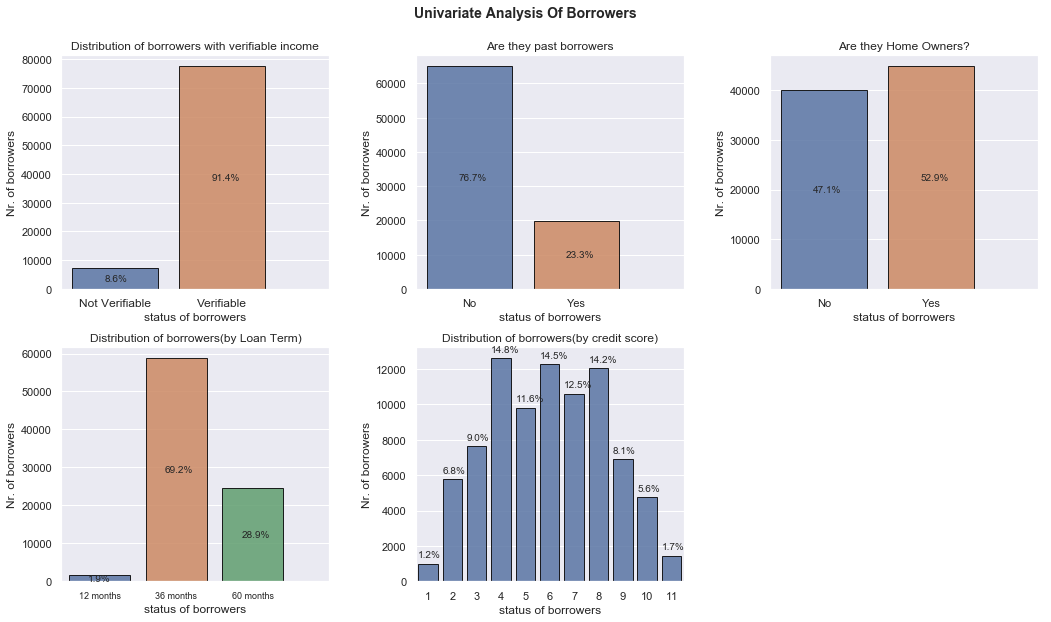

In [20]:
            

# Setting figsize as follows to use the A4(portrait) height with a 16/9 aspect ratio.
# (the aspect ratio for most computer screens (and projectors) is 16/9)
plt.figure(figsize=(14.70, 8.27))
base_color = sns.color_palette()[0]



# Distribution of borrowers based on proof of income
# and using for loops to show the percentage of each bar.
plt.subplot(2, 3, 1)
sns.countplot(data = df_clean, x = 'IncomeVerifiable', ec = 'black', alpha = 0.85)
plt.title("Distribution of borrowers with verifiable income");
plt.ylabel('Nr. of borrowers')
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['IncomeVerifiable'].value_counts().index) + 1), 
           labels = ['Not Verifiable', 'Verifiable'], fontsize = 12)
for i in np.arange(len(df_clean['IncomeVerifiable'].value_counts().index)):
    count = df_clean['IncomeVerifiable'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['IncomeVerifiable'].value_counts().sum())
    plt.text(i-0.1, count/2, pct_string, va = 'center')

# Distribution of borrowers based on previous borrowing records
plt.subplot(2, 3, 2)
sns.countplot(data = df_clean, x = 'PastBorrower', ec = 'black', alpha = 0.85)
plt.title("Are they past borrowers");
plt.ylabel('Nr. of borrowers')
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['PastBorrower'].value_counts().index) + 1), 
           labels = ['No', 'Yes'])
for i in np.arange(len(df_clean['PastBorrower'].value_counts().index)):
    count = df_clean['PastBorrower'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['PastBorrower'].value_counts().sum())
    plt.text(i-0.1, count/2, pct_string, va = 'center')

# Distriution of borrowers based on real estate holdings
plt.subplot(2, 3, 3)
sns.countplot(data = df_clean, x = 'IsBorrowerHomeowner', ec = 'black', alpha = 0.85)
plt.title("Are they Home Owners?");
plt.ylabel('Nr. of borrowers');
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['IsBorrowerHomeowner'].value_counts().index) + 1), 
           labels = ['No', 'Yes'])
for i in np.arange(len(df_clean['IsBorrowerHomeowner'].value_counts().index)):
    count = df_clean['IsBorrowerHomeowner'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['IsBorrowerHomeowner'].value_counts().sum())
    plt.text(i-0.1, count/2, pct_string, va = 'center')


# Distribution of borrower based on loan term
plt.subplot(2, 3, 4)
sns.countplot(data = df_clean, x = 'Term', ec = 'black', alpha = 0.85)
plt.title("Distribution of borrowers(by Loan Term)");
plt.ylabel('Nr. of borrowers');
plt.xlabel('status of borrowers')
plt.xticks(np.arange(len(df_clean['Term'].value_counts().index) + 1),
           labels = ['12 months', '36 months', '60 months'], fontsize = 9)
num = 0
for i in df_clean['Term'].value_counts().sort_index(ascending = True).index:    
    count = df_clean['Term'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['Term'].value_counts().sum())
    plt.text(num-0.15, count/2, pct_string, va = 'center')
    num += 1
    

# Distribution of borrwers based on Prosper Score.
plt.subplot(2, 3, 5)
sns.countplot(data = df_clean, x = 'ProsperScore', color = base_color,
              order = np.arange(1, 12, 1), ec = 'black', alpha = 0.85)
plt.title("Distribution of borrowers(by credit score)");
for i in np.arange(df_clean['ProsperScore'].value_counts().index.min(),
                   len(df_clean['ProsperScore'].value_counts().index)+1, 1):
    count = df_clean['ProsperScore'].value_counts()[i]
    pct_string = '{:0.1f}%'.format(100*count / df_clean['ProsperScore'].value_counts().sum())
    plt.text(i-1.4, count + 500, pct_string, va = 'center')
plt.ylabel('Nr. of borrowers');
plt.xlabel('status of borrowers')

plt.subplots_adjust(hspace=0.5, wspace=0.5);
plt.suptitle("Univariate Analysis of Borrowers".title(), fontsize = 14, weight = "bold", y = 1.04)
plt.tight_layout(); 

> _Most of the borrowers have proof of income and real estate as well as previous loan records. And in most of the cases, The life of loans 3 years. Also, there is roughly one normal distribution in credit score subplot with two exceptional high counts when Score 4 and Score 8  are  and 14.8% and 14.2%_

### Visualisation 2

> _The visualiztion will investigate the  average Borrower APR of each occupation._

In [21]:
np.arange(0, 21317, 1000)

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000, 20000, 21000])

In [22]:
df_clean.head()

,ListingKey,ListingCreationDate,CreditGrade,LoanNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating(Alpha),ListingCategory (numeric),ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,PastBorrower,Investors,CurrentDelinquencies,AmountDelinquent,StatedAnnualIncome
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,134815,36,Current,0.12016,0.0920,NaN,Home Improvement,7.0,CO,Professional,Employed,44.0,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,0,No,1,0.0,0.0,73500.000000
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,77296,36,Current,0.12528,0.0974,NaN,Motorcycle,9.0,GA,Skilled Labor,Employed,113.0,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,16,No,158,4.0,10056.0,34500.000000
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,102670,36,Current,0.24614,0.2085,NaN,Home Improvement,4.0,MN,Executive,Employed,44.0,True,0.0,0.26,"$100,000+",True,9583.333333,0,6,Yes,20,0.0,0.0,114999.999996
5,0F05359734824199381F61D,2013-12-14 08:26:37.093000000,NaN,123257,60,Current,0.15425,0.1314,NaN,Debt Consolidation,10.0,NM,Professional,Employed,82.0,True,0.0,0.36,"$100,000+",True,8333.333333,0,3,No,1,0.0,0.0,99999.999996
6,0F0A3576754255009D63151,2013-04-12 09:52:56.147000000,NaN,88353,36,Current,0.31032,0.2712,NaN,Debt Consolidation,2.0,KS,Sales - Retail,Employed,172.0,False,0.0,0.27,"$25,000-49,999",True,2083.333333,0,11,No,1,0.0,0.0,24999.999996


In [23]:
df_clean.groupby('Occupation')['BorrowerAPR'].mean()

Occupation
Accountant/CPA                        0.216705
Administrative Assistant              0.249081
Analyst                               0.209107
Architect                             0.200610
Attorney                              0.199491
Biologist                             0.217704
Bus Driver                            0.243542
Car Dealer                            0.224016
Chemist                               0.217413
Civil Service                         0.225464
Clergy                                0.233506
Clerical                              0.245028
Computer Programmer                   0.201501
Construction                          0.223994
Dentist                               0.218408
Doctor                                0.191809
Engineer - Chemical                   0.193837
Engineer - Electrical                 0.201532
Engineer - Mechanical                 0.207822
Executive                             0.205469
Fireman                               0.223061
Fl

In [24]:
np.linspace(0, df_clean['BorrowerAPR'].max(), 25)

array([0.        , 0.01766458, 0.03532917, 0.05299375, 0.07065833,
       0.08832292, 0.1059875 , 0.12365208, 0.14131667, 0.15898125,
       0.17664583, 0.19431042, 0.211975  , 0.22963958, 0.24730417,
       0.26496875, 0.28263333, 0.30029792, 0.3179625 , 0.33562708,
       0.35329167, 0.37095625, 0.38862083, 0.40628542, 0.42395   ])

In [25]:
np.arange(0, df_clean['BorrowerAPR'].max(), 0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42])

In [26]:
df_clean['BorrowerAPR'].describe()

count    84853.000000
mean         0.226658
std          0.079916
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

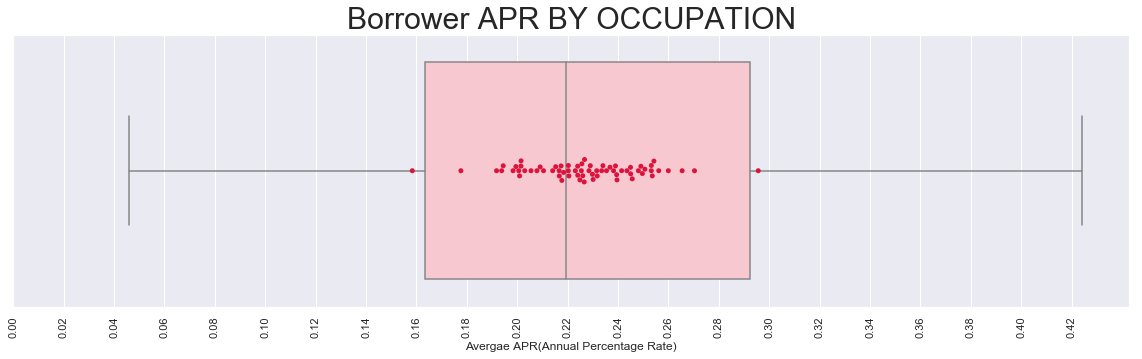

In [27]:
plt.figure(figsize=(20, 5))
# box plot of df_clean['BorrowerAPR']
sns.boxplot(df_clean['BorrowerAPR'], color = 'pink')
# Swarm plot of average APR of borrower groups from different occupations.
sns.swarmplot(df_clean.groupby('Occupation')['BorrowerAPR'].mean(), color='crimson') 
plt.title('Borrower APR BY OCCUPATION', size=30);
plt.xlabel('Avergae APR(Annual Percentage Rate)')
plt.xticks(np.arange(0, df_clean['BorrowerAPR'].max(), 0.02), rotation = 90);

In [28]:
df_clean['BorrowerAPR'].describe()

count    84853.000000
mean         0.226658
std          0.079916
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

> _APR of borrowers of each occupation have been within the range of Q1(0.163280) and Q3(0.292540) of the dataset. And there are only 2 groups of borrowers whose APRs are out of the range(Student - Technical School: 0.158370, Student - College Sophomore: 0.295652)_

## Bivariate Exploration

> _In this section, we will investigate relationships between pairs of variables in the data._

### Visualisation 3

> _The visualiztion will be focused on distributions of Borrower based on APR in each Prosper Score._

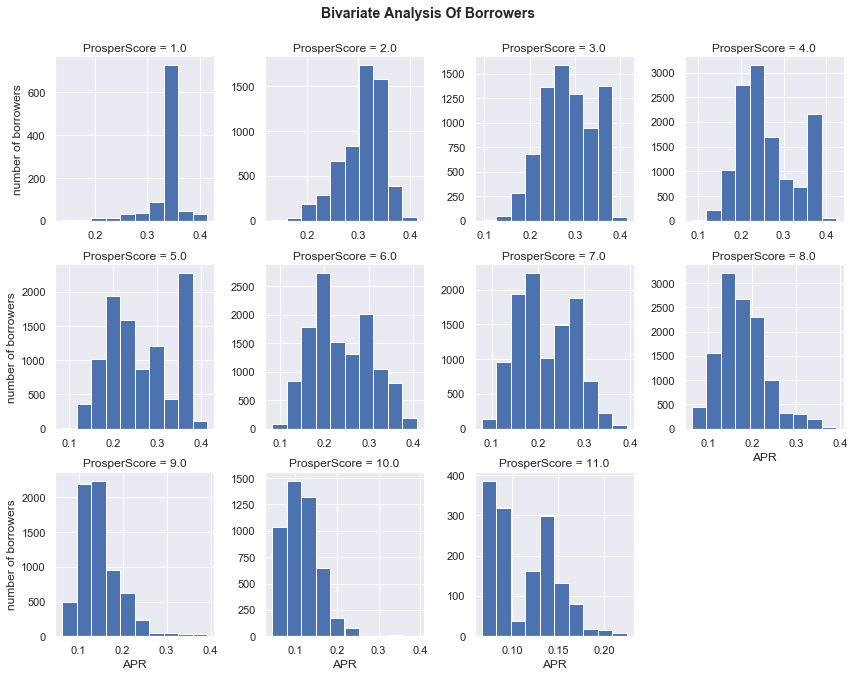

In [29]:
g = sns.FacetGrid(data = df_clean, col = 'ProsperScore', col_wrap = 4, sharey= False, sharex= False)
g.map(plt.hist, 'BorrowerAPR').set_axis_labels('APR','number of borrowers');

plt.suptitle("Bivariate Analysis of Borrowers".title(), fontsize = 14, weight = "bold", y = 1.04)
plt.tight_layout(); 

> _Visually assessing the facet grid, we could somehow see that distribution of borrowers incline toward lower APR as ProsperScore gets higher._

### Visualisation 4

> _The visualisation looks into the linear relationship between two variable: Borrower APR and Prosper Score._

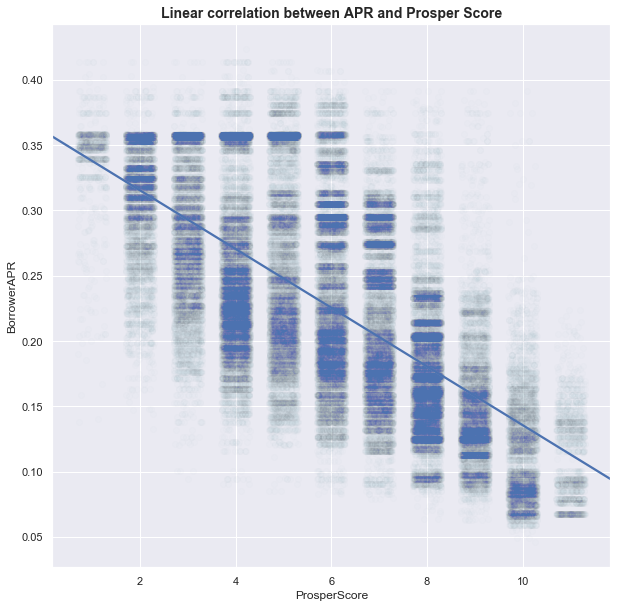

In [30]:
plt.figure(figsize=(10,10))

plt.title('Linear correlation between APR and Prosper Score', fontsize = 14, weight = 'bold')
sns.regplot(data = df_clean, x = 'ProsperScore', y = 'BorrowerAPR',
            x_jitter = 0.3, scatter_kws = {'alpha': 1/150});

> _We could prove the conclusion of Visualization 3, from a different perspective, that ProsperScore has the strong relationship with Borrower's APR (negatively correlated)._

### Visualisation 5

> _The visualiztion will investigate the SUM of Loan Number of each occupation._

In [31]:
sum_of_loan_by_occupation = df_clean.groupby('Occupation')['LoanNumber'].sum().sort_values(ascending = False).reset_index()
sum_of_loan_by_occupation.head()

,Occupation,LoanNumber
0,Other,1801967480
1,Professional,897935370
2,Executive,306424236
3,Computer Programmer,263898415
4,Teacher,250135512


In [32]:
sum_of_loan = np.sum(sum_of_loan_by_occupation['LoanNumber'])
sum_of_loan

7187003644

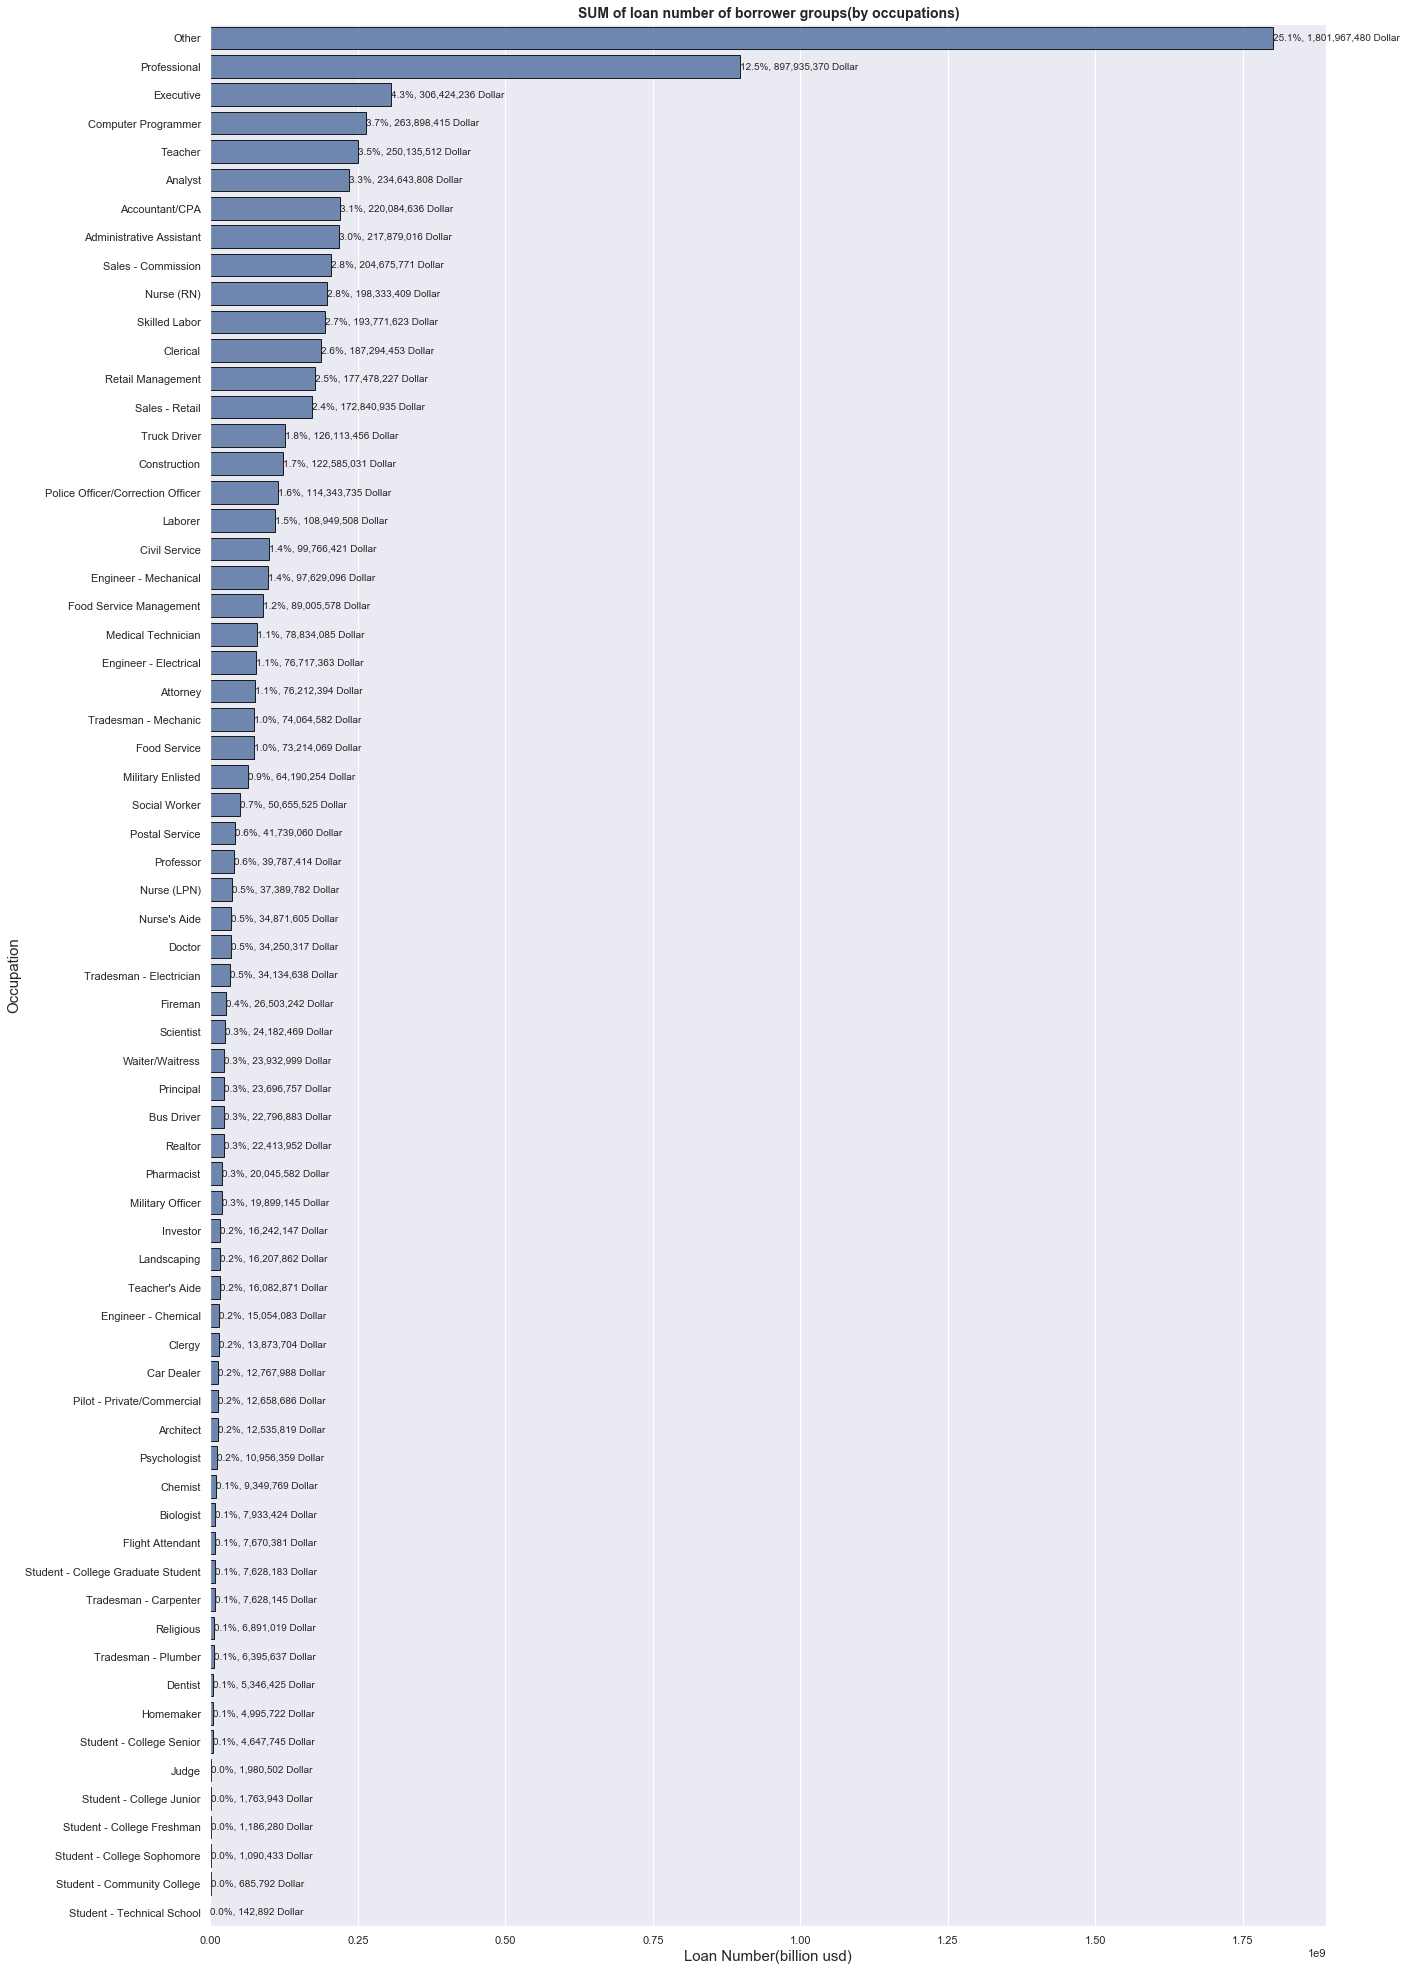

In [33]:
plt.figure(figsize=(20,35))

plt.title('SUM of loan number of borrower groups(by occupations)', fontsize = 14, weight = 'bold')
sns.barplot(data = sum_of_loan_by_occupation, x ='LoanNumber', y = 'Occupation', color = base_color,
            ec = 'black', alpha = 0.85)
plt.rc('ytick', labelsize = 15)
plt.rc('xtick', labelsize = 15)
plt.ylabel('Occupation', fontsize = 15)
plt.xlabel('Loan Number(billion usd)', fontsize = 15)
for i in range(sum_of_loan_by_occupation.shape[0]):
    count = sum_of_loan_by_occupation['LoanNumber'][i]
    pct_string = '{:0.1f}%, {:,} Dollar'.format(100*count / sum_of_loan, count)
    plt.text(count+1, i, pct_string, va = 'center');

> _The bar plot is made also to show that 0% of Loan Number does not stand for None in Loan Number._

### Visualisation 6

> _The visualiztion will investigate average Prosper Score of borrower groups(by occupations)_.

In [34]:
df_clean.head()

,ListingKey,ListingCreationDate,CreditGrade,LoanNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating(Alpha),ListingCategory (numeric),ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,PastBorrower,Investors,CurrentDelinquencies,AmountDelinquent,StatedAnnualIncome
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,134815,36,Current,0.12016,0.0920,NaN,Home Improvement,7.0,CO,Professional,Employed,44.0,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,0,No,1,0.0,0.0,73500.000000
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,77296,36,Current,0.12528,0.0974,NaN,Motorcycle,9.0,GA,Skilled Labor,Employed,113.0,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,16,No,158,4.0,10056.0,34500.000000
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,102670,36,Current,0.24614,0.2085,NaN,Home Improvement,4.0,MN,Executive,Employed,44.0,True,0.0,0.26,"$100,000+",True,9583.333333,0,6,Yes,20,0.0,0.0,114999.999996
5,0F05359734824199381F61D,2013-12-14 08:26:37.093000000,NaN,123257,60,Current,0.15425,0.1314,NaN,Debt Consolidation,10.0,NM,Professional,Employed,82.0,True,0.0,0.36,"$100,000+",True,8333.333333,0,3,No,1,0.0,0.0,99999.999996
6,0F0A3576754255009D63151,2013-04-12 09:52:56.147000000,NaN,88353,36,Current,0.31032,0.2712,NaN,Debt Consolidation,2.0,KS,Sales - Retail,Employed,172.0,False,0.0,0.27,"$25,000-49,999",True,2083.333333,0,11,No,1,0.0,0.0,24999.999996


In [35]:
df_clean['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [36]:
np.linspace(1,12, 12)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

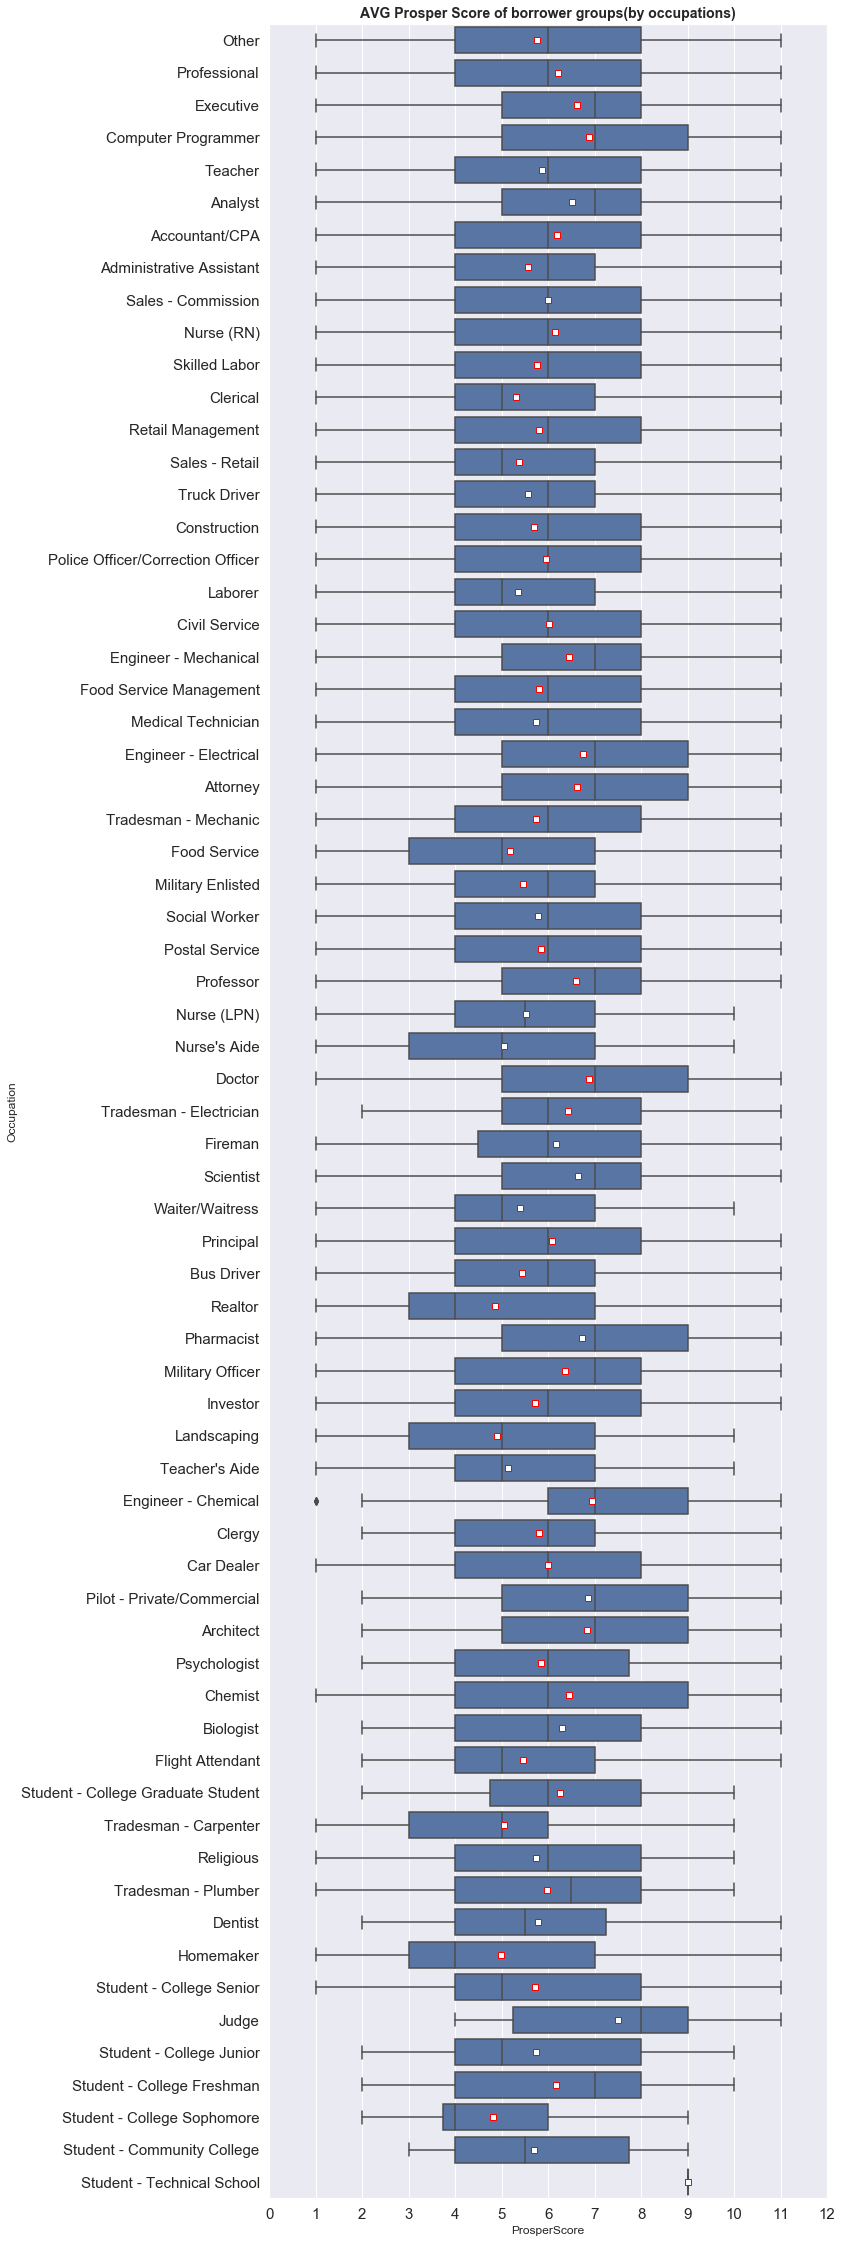

In [37]:
# Boxplot that shows average Prosper Score of borrower groups from varying occupations.

plt.figure(figsize = [10, 40])
plt.title('AVG Prosper Score of borrower groups(by occupations)', fontsize = 14, weight = 'bold')
base_color = sns.color_palette()[0]
sns.boxplot(data = df_clean, x = 'ProsperScore', y = 'Occupation', order = sum_of_loan_by_occupation['Occupation'],
            color = base_color, showmeans=True, 
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"red"})
plt.yticks(fontsize = 15)
plt.xticks(np.arange(0, df_clean['ProsperScore'].max() + 2, 1));

> _The box plot shows that, in most of the cases, AVG Prosper Score of borrower groups lies between 5 and 7._

## Multivariate Exploration

> _We will create plots of three or more variables to investigate the data even
further._

### Visualisation 7

In [38]:
df_clean.head()

,ListingKey,ListingCreationDate,CreditGrade,LoanNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating(Alpha),ListingCategory (numeric),ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,PastBorrower,Investors,CurrentDelinquencies,AmountDelinquent,StatedAnnualIncome
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,134815,36,Current,0.12016,0.0920,NaN,Home Improvement,7.0,CO,Professional,Employed,44.0,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,0,No,1,0.0,0.0,73500.000000
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,77296,36,Current,0.12528,0.0974,NaN,Motorcycle,9.0,GA,Skilled Labor,Employed,113.0,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,16,No,158,4.0,10056.0,34500.000000
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,102670,36,Current,0.24614,0.2085,NaN,Home Improvement,4.0,MN,Executive,Employed,44.0,True,0.0,0.26,"$100,000+",True,9583.333333,0,6,Yes,20,0.0,0.0,114999.999996
5,0F05359734824199381F61D,2013-12-14 08:26:37.093000000,NaN,123257,60,Current,0.15425,0.1314,NaN,Debt Consolidation,10.0,NM,Professional,Employed,82.0,True,0.0,0.36,"$100,000+",True,8333.333333,0,3,No,1,0.0,0.0,99999.999996
6,0F0A3576754255009D63151,2013-04-12 09:52:56.147000000,NaN,88353,36,Current,0.31032,0.2712,NaN,Debt Consolidation,2.0,KS,Sales - Retail,Employed,172.0,False,0.0,0.27,"$25,000-49,999",True,2083.333333,0,11,No,1,0.0,0.0,24999.999996


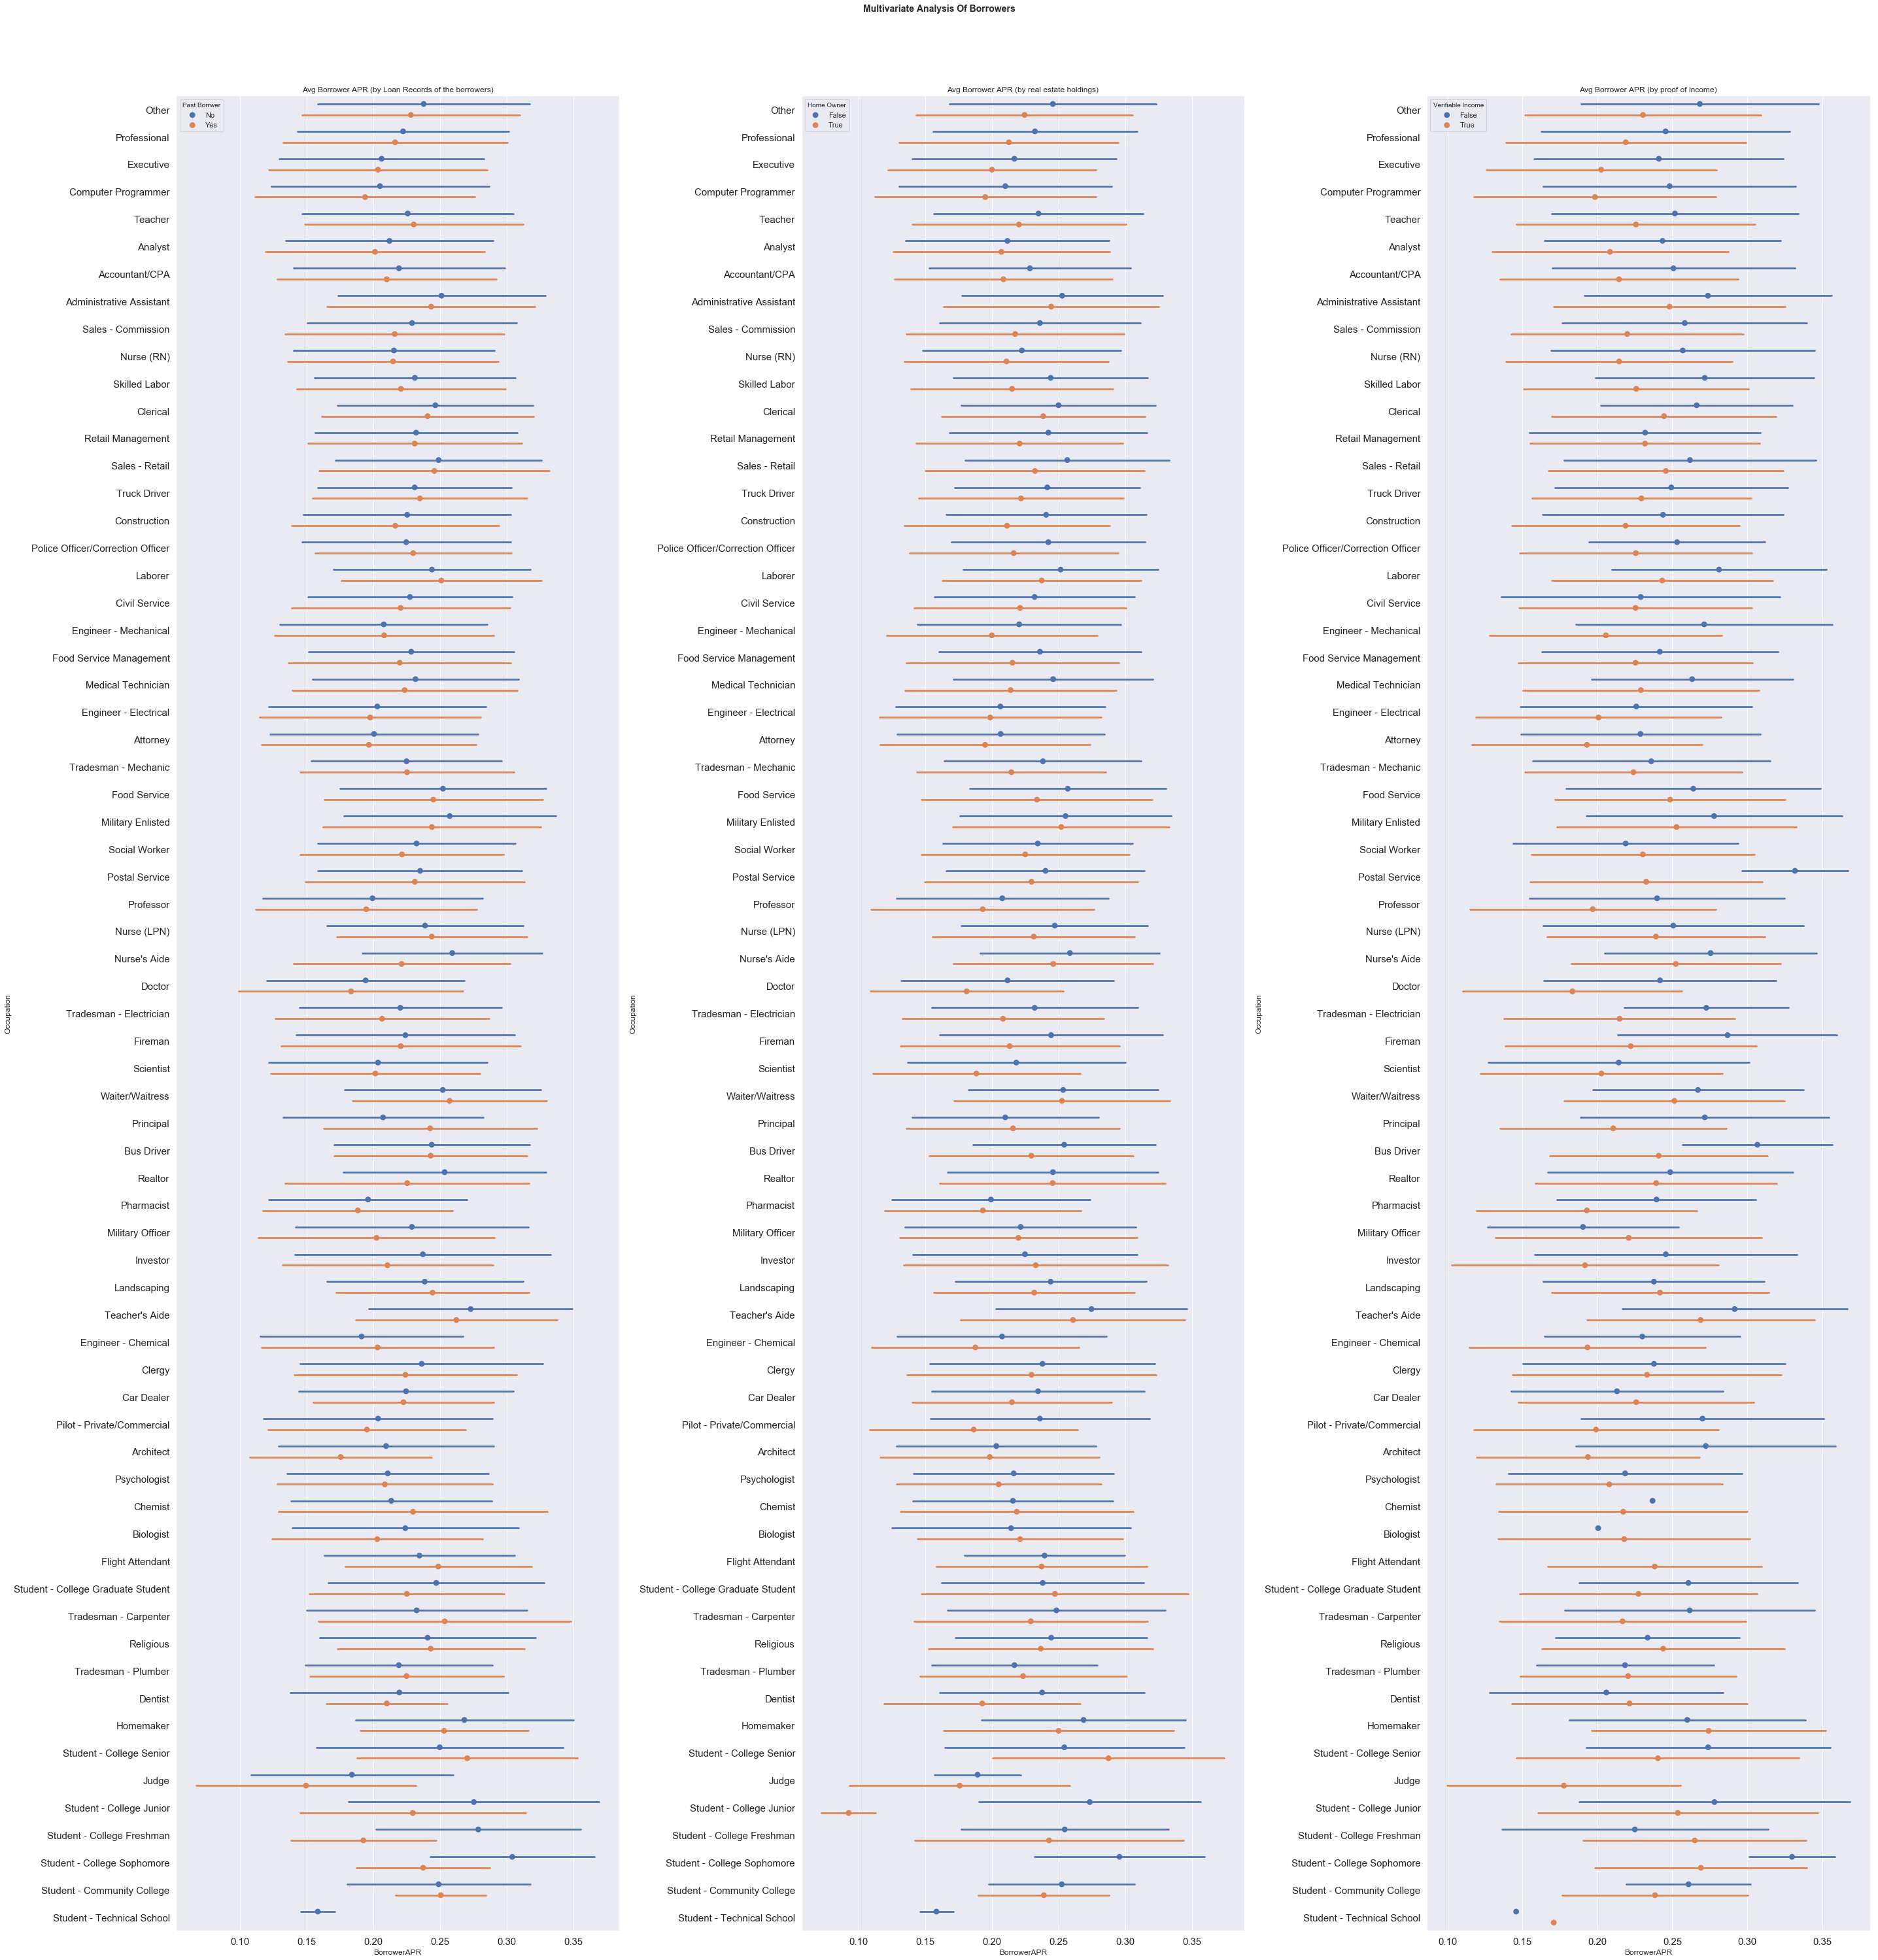

In [39]:
plt.figure(figsize=(40, 40))


# A pointplot that shows average APR of borrower groups from varying occupations(by loan records)
plt.subplot(1, 3, 1)
plt.title('Avg Borrower APR (by Loan Records of the borrowers)')
sns.pointplot(data = df_clean, x = 'BorrowerAPR', y = 'Occupation', hue = 'PastBorrower', linestyles = '',
              order = sum_of_loan_by_occupation['Occupation'], dodge = 0.4, ci = 'sd', palette = 'deep')
plt.legend(loc = 2, title = 'Past Borrwer')


# A pointplot that shows average APR of borrower groups from varying occupations(by real estate holdings)
plt.subplot(1, 3, 2)
plt.title('Avg Borrower APR (by real estate holdings)')
sns.pointplot(data = df_clean, x = 'BorrowerAPR', y = 'Occupation', hue = 'IsBorrowerHomeowner', linestyles = '',
              order = sum_of_loan_by_occupation['Occupation'], dodge = 0.4, ci = 'sd', palette = 'deep')
plt.legend(loc = 2, title = 'Home Owner')


# A pointplot that shows average APR of borrower groups from varying occupations(by proof of income)
plt.subplot(1, 3, 3)
plt.title('Avg Borrower APR (by proof of income)')
sns.pointplot(data = df_clean, x = 'BorrowerAPR', y = 'Occupation', hue = 'IncomeVerifiable', linestyles = '',
              order = sum_of_loan_by_occupation['Occupation'], dodge = 0.4, ci = 'sd', palette = 'deep')
plt.legend(loc = 2, title = 'Verifiable Income')

plt.subplots_adjust(hspace=0.5, wspace=0.5);
plt.suptitle("Multivariate Analysis of Borrowers".title(), fontsize = 14, weight = "bold", y = 1.04)
plt.tight_layout(); 

> _Borrowers that have loan records in the past tended to receive lower APR percentage, and borrower with real estate holdings and proof of income tended to receive lower APR percentage as well. Because such statuses reflect the borrower's personality to be more trustworthy._

### Visualisation 8

> _The Reference Table of Borrower APR values based on Occupation and Listing Category is made._

In [40]:
occupation_avg_score = df_clean.groupby(['Occupation', 'ListingCategory (numeric)'])['BorrowerAPR'].mean().reset_index(name = 'avg score')
occupation_avg_score

,Occupation,ListingCategory (numeric),avg score
0,Accountant/CPA,Auto,0.217368
1,Accountant/CPA,Baby&Adoption,0.158421
2,Accountant/CPA,Business,0.238333
3,Accountant/CPA,Cosmetic Procedure,0.302850
4,Accountant/CPA,Debt Consolidation,0.209117
5,Accountant/CPA,Engagement Ring,0.169762
6,Accountant/CPA,Green Loans,0.195845
7,Accountant/CPA,Home Improvement,0.223870
8,Accountant/CPA,Household Expenses,0.248594
9,Accountant/CPA,Large Purchases,0.210841


In [41]:
occupation_avg_score = occupation_avg_score.pivot(index = 'Occupation', columns = 'ListingCategory (numeric)', values = 'avg score')
occupation_avg_score

ListingCategory (numeric),Auto,Baby&Adoption,Boat,Business,Cosmetic Procedure,Debt Consolidation,Engagement Ring,Green Loans,Home Improvement,Household Expenses,Large Purchases,Medical/Dental,Motorcycle,Not Available,Other,RV,Student Use,Taxes,Vacation,Wedding Loans
Occupation,,,,,,,,,,,,,,,,,,,,
Accountant/CPA,0.217368,0.158421,NaN,0.238333,0.302850,0.209117,0.169762,0.195845,0.223870,0.248594,0.210841,0.250891,0.235692,NaN,0.231903,0.295370,0.199851,0.235884,0.255216,0.216430
Administrative Assistant,0.287495,0.232953,NaN,0.256892,0.285901,0.241264,0.271025,NaN,0.252746,0.265726,0.239000,0.255525,0.348097,NaN,0.267760,0.335530,0.272088,0.271762,0.248919,0.228514
Analyst,0.226346,0.222587,0.153035,0.208410,0.183000,0.203034,0.210723,0.196450,0.211241,0.245207,0.214424,0.233515,0.272371,0.068880,0.222328,0.357970,0.219336,0.233637,0.212880,0.224733
Architect,NaN,0.216050,NaN,0.226123,NaN,0.185849,NaN,NaN,0.218744,0.357970,0.280423,0.221342,0.283390,NaN,0.239212,NaN,NaN,0.242460,0.144530,0.199370
Attorney,0.207218,0.140952,0.158330,0.229343,NaN,0.194645,0.188327,NaN,0.190580,0.183166,0.172033,0.195008,NaN,NaN,0.224780,NaN,0.103987,0.212356,0.204560,0.205603
Biologist,0.171620,NaN,NaN,0.216980,NaN,0.219121,0.219350,NaN,0.225798,NaN,0.172340,0.198340,NaN,NaN,0.260893,NaN,NaN,NaN,0.152953,NaN
Bus Driver,0.235505,NaN,NaN,0.230042,NaN,0.238432,NaN,0.352850,0.220783,0.256570,0.288760,0.243358,0.247325,NaN,0.274146,NaN,NaN,0.358380,NaN,0.221153
Car Dealer,0.233218,NaN,NaN,0.176150,NaN,0.218980,0.308990,NaN,0.231416,0.279480,0.274285,NaN,NaN,NaN,0.249009,NaN,NaN,NaN,NaN,NaN
Chemist,0.172356,NaN,NaN,0.196594,NaN,0.214789,NaN,NaN,0.203832,0.284065,0.193230,0.253810,NaN,NaN,0.261980,NaN,NaN,0.226070,0.288510,0.307560


In [42]:
occupation_avg_score.index

Index(['Accountant/CPA', 'Administrative Assistant', 'Analyst', 'Architect',
       'Attorney', 'Biologist', 'Bus Driver', 'Car Dealer', 'Chemist',
       'Civil Service', 'Clergy', 'Clerical', 'Computer Programmer',
       'Construction', 'Dentist', 'Doctor', 'Engineer - Chemical',
       'Engineer - Electrical', 'Engineer - Mechanical', 'Executive',
       'Fireman', 'Flight Attendant', 'Food Service',
       'Food Service Management', 'Homemaker', 'Investor', 'Judge', 'Laborer',
       'Landscaping', 'Medical Technician', 'Military Enlisted',
       'Military Officer', 'Nurse (LPN)', 'Nurse (RN)', 'Nurse's Aide',
       'Other', 'Pharmacist', 'Pilot - Private/Commercial',
       'Police Officer/Correction Officer', 'Postal Service', 'Principal',
       'Professional', 'Professor', 'Psychologist', 'Realtor', 'Religious',
       'Retail Management', 'Sales - Commission', 'Sales - Retail',
       'Scientist', 'Skilled Labor', 'Social Worker',
       'Student - College Freshman', 'Stude

In [43]:
occupation_avg_score = occupation_avg_score.reindex(sum_of_loan_by_occupation['Occupation'])
occupation_avg_score

ListingCategory (numeric),Auto,Baby&Adoption,Boat,Business,Cosmetic Procedure,Debt Consolidation,Engagement Ring,Green Loans,Home Improvement,Household Expenses,Large Purchases,Medical/Dental,Motorcycle,Not Available,Other,RV,Student Use,Taxes,Vacation,Wedding Loans
Occupation,,,,,,,,,,,,,,,,,,,,
Other,0.252448,0.234739,0.226914,0.255075,0.280734,0.224801,0.243350,0.252775,0.238638,0.269845,0.242062,0.252589,0.214935,0.271412,0.256612,0.238601,0.238663,0.251374,0.248183,0.252975
Professional,0.238464,0.233049,0.222380,0.231630,0.216062,0.213614,0.211075,0.157933,0.227044,0.248616,0.205573,0.228656,0.215970,0.299810,0.240574,0.227206,0.231937,0.222078,0.232553,0.227291
Executive,0.226363,0.205460,0.192882,0.217551,0.252590,0.198221,0.176425,0.155380,0.216372,0.237757,0.201025,0.218989,0.177002,NaN,0.219405,0.200810,NaN,0.222694,0.248695,0.194908
Computer Programmer,0.211662,0.172348,0.138238,0.215022,0.226075,0.195330,0.222227,0.269775,0.202344,0.225507,0.173596,0.234298,0.251974,NaN,0.206115,0.248263,0.292454,0.240086,0.200692,0.226209
Teacher,0.254137,0.212348,NaN,0.227621,0.189510,0.213704,0.315215,0.083250,0.249507,0.253515,0.242514,0.262721,0.256906,NaN,0.256604,0.239320,0.202414,0.253766,0.253196,0.264309
Analyst,0.226346,0.222587,0.153035,0.208410,0.183000,0.203034,0.210723,0.196450,0.211241,0.245207,0.214424,0.233515,0.272371,0.068880,0.222328,0.357970,0.219336,0.233637,0.212880,0.224733
Accountant/CPA,0.217368,0.158421,NaN,0.238333,0.302850,0.209117,0.169762,0.195845,0.223870,0.248594,0.210841,0.250891,0.235692,NaN,0.231903,0.295370,0.199851,0.235884,0.255216,0.216430
Administrative Assistant,0.287495,0.232953,NaN,0.256892,0.285901,0.241264,0.271025,NaN,0.252746,0.265726,0.239000,0.255525,0.348097,NaN,0.267760,0.335530,0.272088,0.271762,0.248919,0.228514
Sales - Commission,0.251386,0.227120,0.227837,0.237271,0.319323,0.217606,0.253462,0.357970,0.219502,0.279857,0.247170,0.247514,0.263114,NaN,0.245634,0.152230,0.233050,0.229715,0.257749,0.234606


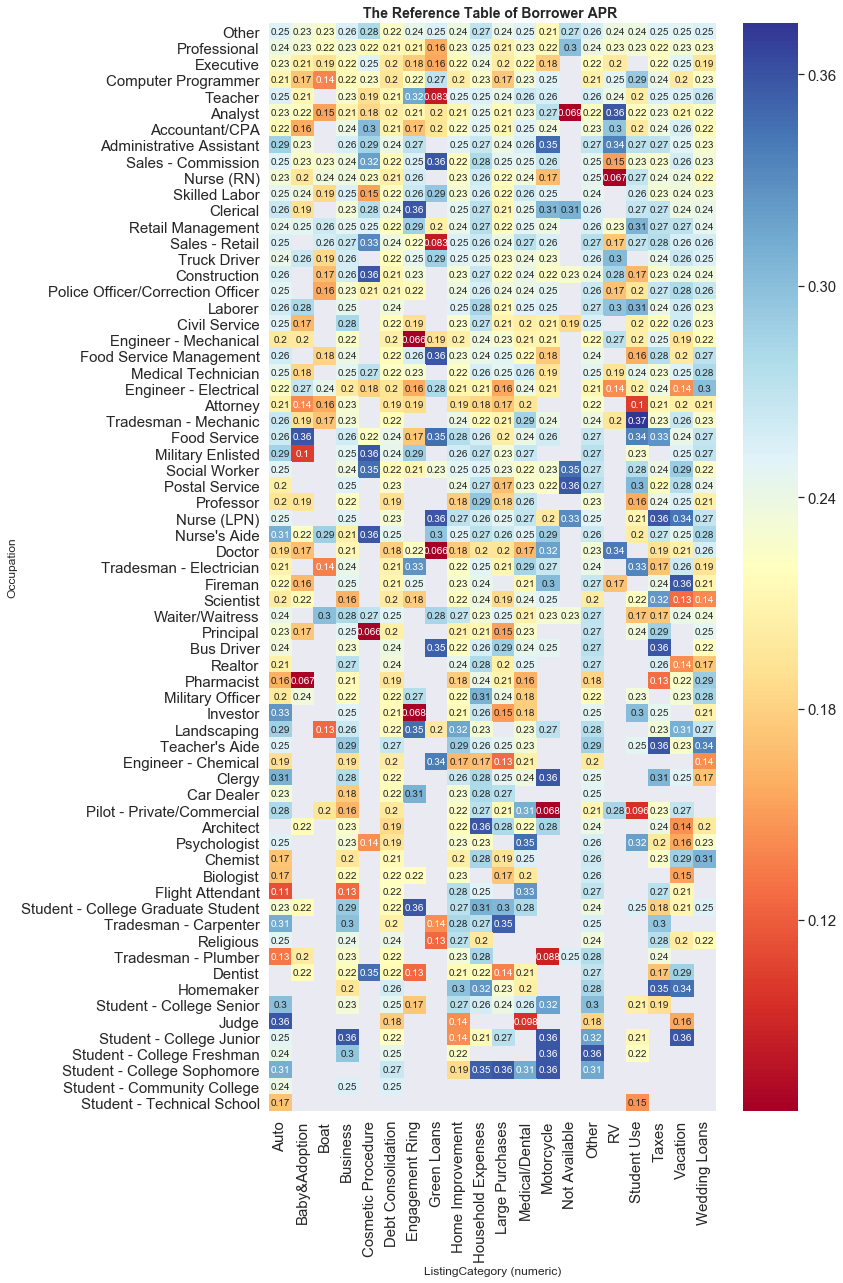

In [44]:
# So the creditor(Prosper) could decide optimum APR for each potential borrower in varying cases as follows:

plt.figure(figsize=(10,20))
plt.title('The Reference Table of Borrower APR ', fontsize = 14, weight = "bold")
sns.heatmap(occupation_avg_score, annot = True, cmap="RdYlBu");

> _Rather than providing an insight, the table is made so that the creditor(Prosper) could decide optimum APR for each potential borrower(from different occupation) in varying cases as above._